<a href="https://colab.research.google.com/github/bharatgirdhar/DeepVisionProject/blob/main/Custom_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision

!pip install -U albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

     |████████████████████████████████| 102kB 6.6MB/s 
     |████████████████████████████████| 38.2MB 76kB/s 
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
#!git clone https://github.com/bharatgirdhar/DeepVisionProject.git

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
#os.chdir('/content/DeepVisionProject')
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
#os.listdir()
#print('Main folder structure :')
#%ls
#print('/ ')
#print('models folder content :')
#os.chdir('./models')
#%ls
#os.chdir('../')

In [ ]:
!pip install import_ipynb
import import_ipynb

import main as Main
import utils as Utilities
#os.chdir('./models')
import Custom_Resnet_Session9 as Module

#from utils import progress_bar

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=118aa37385dedbb073b9f5666014210b58e4be61b3c7c965304c037ac9097127
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from main.ipynb
==> Preparing data..
importing Jupyter notebook from utils.ipynb
Requirement already up-to-date: albumentations in /usr/local/lib/python3.7/dist-packages (1.0.1)
importing Jupyter notebook from Custom_Resnet_Session9.ipynb


/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:690: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 2178, 274])
 deer   cat  ship  deer


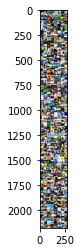

In [ ]:
from torchvision import datasets, transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'

tMean = (0.4914, 0.4822, 0.4465)
tStandardDev = (0.2023, 0.1994, 0.2010)
transform_train= Utilities.Utilities.ApplyTransformationsTrain(tMean,tStandardDev,4,8)
transform_test=Utilities.Utilities.ApplyTransformationsTest(tMean,tStandardDev)

vTrainBatchsize=512
trainloader = Main.CreateCIFAR10TrainSet(vTrainBatchsize,transform_train)


#train_transform=transforms.Compose([
                        #transforms.RandomRotation(degrees=(-30,30)),
#                        transforms.ToTensor(),
#                        transforms.Normalize(tMean, tStandardDev)
#                        ])

#train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transform)
batch_size=512


#trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                        download=True, transform=Transforms(transform))

#trainset = AlbumentationImageDataset(train_dataset)

vTestBatchsize=512
testloader= Main.CreateCIFAR10TestSet(vTestBatchsize,transform_test)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Utilities.Utilities.ViewTrainingImages(trainloader)



In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Module.Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3          [-1, 128, 32, 32]          73,728
         MaxPool2d-4          [-1, 128, 16, 16]               0
       BatchNorm2d-5          [-1, 128, 16, 16]             256
            Conv2d-6          [-1, 128, 16, 16]         147,456
       BatchNorm2d-7          [-1, 128, 16, 16]             256
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 256, 16, 16]         294,912
        MaxPool2d-11            [-1, 256, 8, 8]               0
      BatchNorm2d-12            [-1, 256, 8, 8]             512
           Conv2d-13            [-1, 512, 8, 8]       1,179,648
        MaxPool2d-14            [-1, 51

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Custom_Resnet_Session9.ipynb:80: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
import torch.optim as optim

In [ ]:
#import torch.nn as nn


criterion = Main.SetLoss(1)
vlr=0.2
optimizer = Main.SetOptimizer(1,vlr,model)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.2, total_steps=12288,pct_start=0.2)
#scheduler = optim.lr_scheduler.StepLR(optimizer,max_lr=0.45, total_steps=12288,pct_start=0.2)

Finding LR

In [ ]:

vNormalizationType=0
for epoch in range(1, 25):
      Main.train(model, device, trainloader, optimizer, epoch,vNormalizationType, criterion)
      Main.test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/98 [00:00<?, ?it/s]Custom_Resnet_Session9.ipynb:80: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=1.6916025876998901 batch_id=97 Accuracy=24.09: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]



EPOCH :  1

Train Loss0.005207407288253307



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.6486, Accuracy: 3801/10000 (38%)



loss=1.3368242979049683 batch_id=97 Accuracy=42.86: 100%|██████████| 98/98 [00:23<00:00,  4.15it/s]



EPOCH :  2

Train Loss0.003044740529730916



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3428, Accuracy: 5021/10000 (50%)



loss=1.111156940460205 batch_id=97 Accuracy=54.63: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]



EPOCH :  3

Train Loss0.002476080320775509



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0779, Accuracy: 6157/10000 (62%)



loss=0.8126034736633301 batch_id=97 Accuracy=64.26: 100%|██████████| 98/98 [00:25<00:00,  3.87it/s]



EPOCH :  4

Train Loss0.001976385246962309



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.8879, Accuracy: 6842/10000 (68%)



loss=0.7104744911193848 batch_id=97 Accuracy=70.01: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]



EPOCH :  5

Train Loss0.0016747892368584871



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7408, Accuracy: 7467/10000 (75%)



loss=0.6600936055183411 batch_id=97 Accuracy=75.76: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



EPOCH :  6

Train Loss0.001374250859953463



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7502, Accuracy: 7423/10000 (74%)



loss=0.5456005334854126 batch_id=97 Accuracy=78.57: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



EPOCH :  7

Train Loss0.0012031784281134605



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6193, Accuracy: 7837/10000 (78%)



loss=0.5134384036064148 batch_id=97 Accuracy=81.72: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]



EPOCH :  8

Train Loss0.0010446205269545317



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5601, Accuracy: 8102/10000 (81%)



loss=0.49029937386512756 batch_id=97 Accuracy=82.52: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]



EPOCH :  9

Train Loss0.000984945916570723



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5832, Accuracy: 8027/10000 (80%)



loss=0.5025649666786194 batch_id=97 Accuracy=84.19: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



EPOCH :  10

Train Loss0.0008932875352911651



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5035, Accuracy: 8298/10000 (83%)



loss=0.4740961194038391 batch_id=97 Accuracy=85.74: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  11

Train Loss0.0008065582951530814



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5356, Accuracy: 8289/10000 (83%)



loss=0.36523404717445374 batch_id=97 Accuracy=86.45: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  12

Train Loss0.0007580933161079884



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5011, Accuracy: 8349/10000 (83%)



loss=0.3988078832626343 batch_id=97 Accuracy=88.28: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]



EPOCH :  13

Train Loss0.0006542777991853654



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4292, Accuracy: 8514/10000 (85%)



loss=0.2782399654388428 batch_id=97 Accuracy=88.73: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



EPOCH :  14

Train Loss0.0006297884392552078



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4175, Accuracy: 8623/10000 (86%)



loss=0.2912638187408447 batch_id=97 Accuracy=89.61: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  15

Train Loss0.0005780919454991817



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4155, Accuracy: 8644/10000 (86%)



loss=0.270937979221344 batch_id=97 Accuracy=90.81: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  16

Train Loss0.0005168149364180863



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4185, Accuracy: 8654/10000 (87%)



loss=0.28172633051872253 batch_id=97 Accuracy=91.69: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]



EPOCH :  17

Train Loss0.0004751638334710151



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3911, Accuracy: 8745/10000 (87%)



loss=0.22025683522224426 batch_id=97 Accuracy=92.29: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  18

Train Loss0.00043733094935305417



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3862, Accuracy: 8778/10000 (88%)



loss=0.25302284955978394 batch_id=97 Accuracy=92.73: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  19

Train Loss0.0004098342324141413



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3789, Accuracy: 8810/10000 (88%)



loss=0.24703161418437958 batch_id=97 Accuracy=93.52: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  20

Train Loss0.00036670180270448327



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4050, Accuracy: 8745/10000 (87%)



loss=0.15111681818962097 batch_id=97 Accuracy=93.32: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  21

Train Loss0.0003680235240608454



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3926, Accuracy: 8774/10000 (88%)



loss=0.12863615155220032 batch_id=97 Accuracy=94.00: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  22

Train Loss0.0003334085049573332



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4159, Accuracy: 8743/10000 (87%)



loss=0.1726718693971634 batch_id=97 Accuracy=94.71: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]



EPOCH :  23

Train Loss0.00029818565235473216



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3497, Accuracy: 8910/10000 (89%)



loss=0.18844154477119446 batch_id=97 Accuracy=95.29: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]



EPOCH :  24

Train Loss0.00026743763010017574



Test set: Average loss: 0.3682, Accuracy: 8904/10000 (89%)

